In [1]:
%reset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #For 3D Plots

#Required by Jupyter for inlining images
%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
data = pd.read_csv('../Data/Abort_Gap_B1.txt',sep=' ', header=None)
data.columns = ['Time Stamp','Reading']
#Readings should not exceed 10e-7

In [6]:
min(data['Time Stamp'])

1534475801.395

In [3]:
data.describe()

,Time Stamp,Reading
count,1.898200e+04,1.898200e+04
mean,1.537150e+09,6.313011e+09
std,1.675229e+06,5.140194e+09
min,1.534476e+09,0.000000e+00
25%,1.535796e+09,2.406413e+09
50%,1.536506e+09,4.823924e+09
75%,1.538614e+09,9.160419e+09
max,1.540021e+09,3.071812e+10


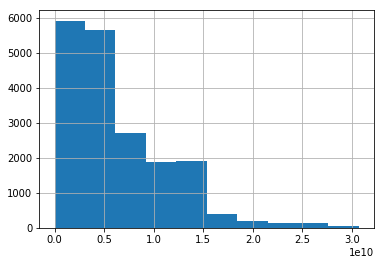

In [4]:
data['Reading'].hist()

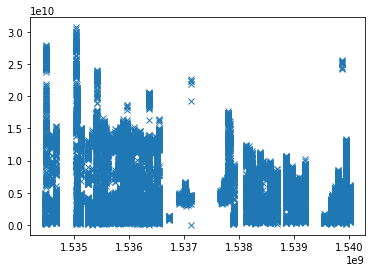

In [8]:
plt.plot(data['Time Stamp'],data['Reading'],'x')

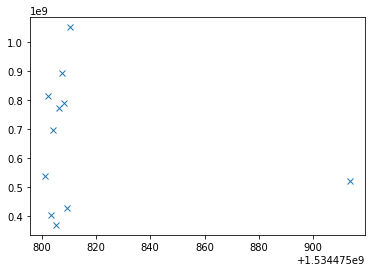

In [11]:
sample = data[0:11]
plt.plot(sample['Time Stamp'],sample['Reading'],'x')
#so the abort gap reading increases as more bunches are added

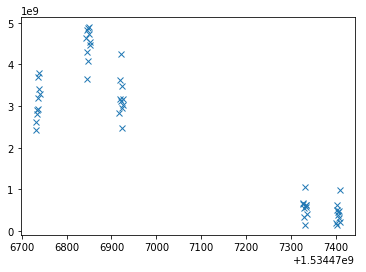

In [9]:
sample = data[50:100]
plt.plot(sample['Time Stamp'],sample['Reading'],'x')

def arrangeData(df):
    #This function will find the row with the maximum sum of each 10s
    #window and store the required data in a new dataframe
    columns = ['Time Stamp', 'Reading']
    resulting_df = pd.DataFrame(columns=columns)
    i = 0
    while i < len(df):
        temp_df = df[i:i+9]
        row = temp_df.loc[temp_df['Reading'].idxmax()]
        resulting_df = resulting_df.append(row,ignore_index=True)
        i = i + 10
    return resulting_df
            

## Get Readings:

In [32]:
time_stamp = []
reading = []

for i in range(10, len(data['Time Stamp']), 10):
    #append readings to list
    time_stamp.append(data['Time Stamp'][i])
    reading.append(data['Reading'][i-1]-data['Reading'][i-10])

Data = pd.DataFrame(data={'Time Stamp Abort Gap': time_stamp, 'Abort Gap Reading': reading})
Data.head()

,Time Stamp Abort Gap,Abort Gap Reading
0,1.534476e+09,5.136406e+08
1,1.534476e+09,1.605127e+08
2,1.534476e+09,-2.453854e+08
3,1.534477e+09,3.852305e+08
4,1.534477e+09,-2.889211e+08


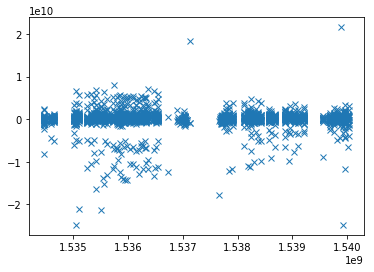

In [33]:
plt.plot(Data['Time Stamp Abort Gap'],Data['Abort Gap Reading'],'x')

In [34]:
Data.to_pickle('../Data/Beam1_AbortGap.pkl')

In [35]:
#The Above is repeated for beam 2
data = pd.read_csv('../Data/Abort_Gap_B2.txt',sep=' ', header=None)
data.columns = ['Time Stamp','Reading']
data.describe()

,Time Stamp,Reading
count,1.739900e+04,1.739900e+04
mean,1.537181e+09,2.918418e+09
std,1.650725e+06,1.317428e+10
min,1.534476e+09,0.000000e+00
25%,1.535797e+09,3.140965e+08
50%,1.536547e+09,1.021867e+09
75%,1.538572e+09,2.463894e+09
max,1.540021e+09,2.646867e+11


In [36]:
time_stamp = []
reading = []

for i in range(10, len(data['Time Stamp']), 10):
    #append readings to list
    time_stamp.append(data['Time Stamp'][i])
    reading.append(data['Reading'][i-1]-data['Reading'][i-10])

Data = pd.DataFrame(data={'Time Stamp Abort Gap': time_stamp, 'Abort Gap Reading': reading})
Data.head()

,Time Stamp Abort Gap,Abort Gap Reading
0,1.534476e+09,6.693859e+08
1,1.534476e+09,2.435535e+09
2,1.534476e+09,8.187105e+08
3,1.534477e+09,1.870090e+08
4,1.534477e+09,-1.265663e+09


In [37]:
Data.to_pickle('../Data/Beam2_AbortGap.pkl')